## Aprendizado por reforço

Na aula de hoje veremos um pouco sobre aprendizado por reforço, ou _reinforcement learning_. Este é um terceiro paradigma de aprendizado que existe numa "zona cinzenta" entre aprendizado supervisionado e não-supervisionado, e é comumente referido como aprendizado "semi-supervisionado". Aqui não temos uma variável resposta para prever, mas conseguimos elencar a _qualidade_ de uma ação e usar isso como target.

Estas técnicas são utilizadas quando:
- Temos um modelo do ambiente mas não temos uma solução
- Só temos uma simulação do ambiente
- A única forma de coletar informação sobre o ambiente é interagindo com este

Modelos de _reinforcement learning_ normalmente são os invocados no imaginário popular ao ouvir o termo "inteligência artificial". Veículos autônomos são bons exemplos de aplicação de aprendizado por reforço, assim como os algoritmos que jogam jogos (e.g. DeepMind, AlphaGo). Também têm um papel importantíssimo na robótica e teoria de controle ótimo.

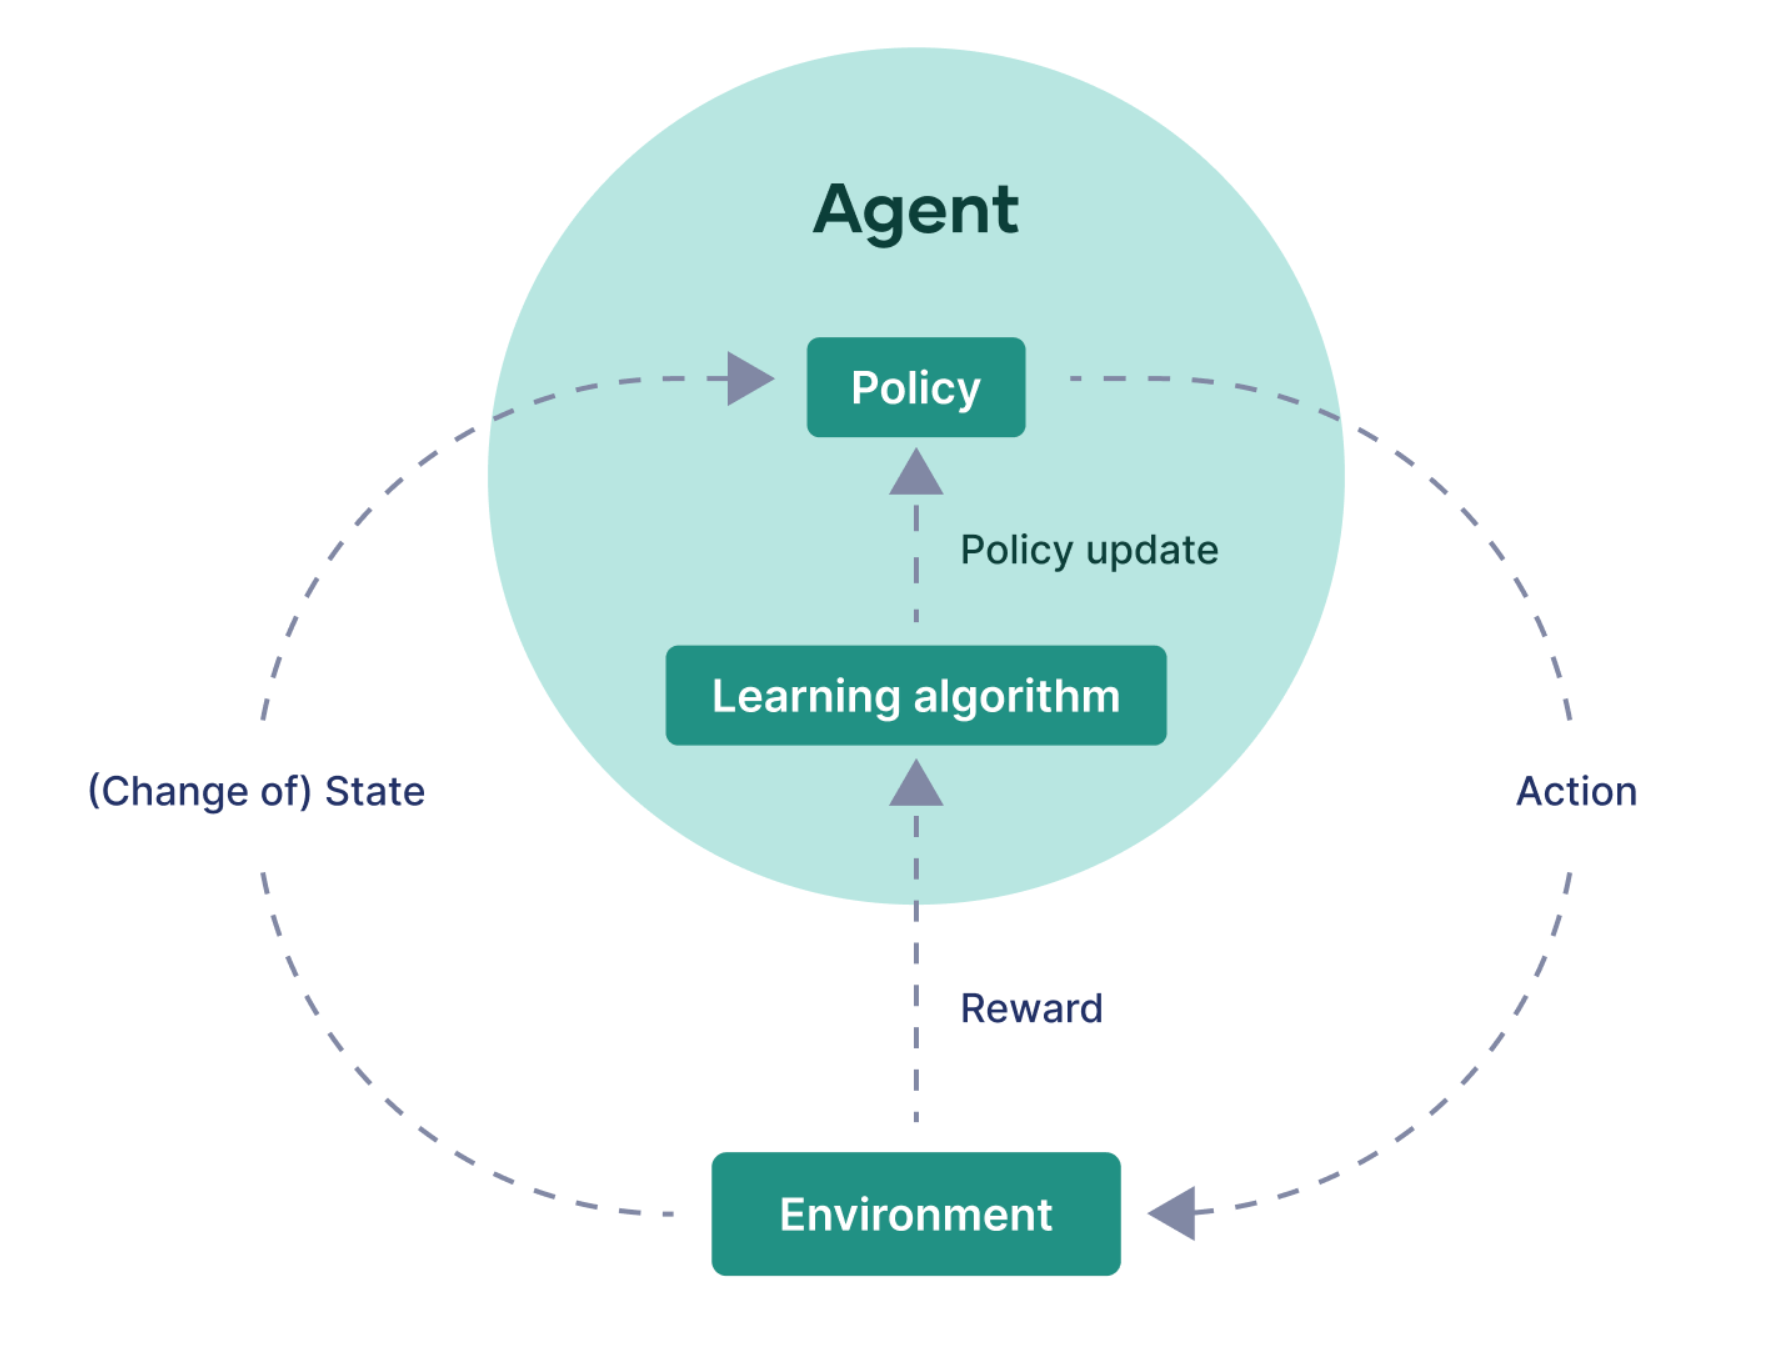

Vamos definir alguns termos:

- `agente` é uma instância do modelo, um "jogador"
- `ambiente` representa o problema simulado a ser resolvido
- `estado` é uma representação das informações atuais do ambiente
- `ação` é a saída do modelo, e necessária para determinar o próximo estado
- `política` é a heurística de decisão do agente
- `recompensa` diz respeito ao feedback de qualidade das ações

De forma simplificada, podemos dizer que as técnicas de aprendizado por reforço aprendem com _tentativa e erro_. Uma analogia direta é o processo de ensinar truques a cachorros:

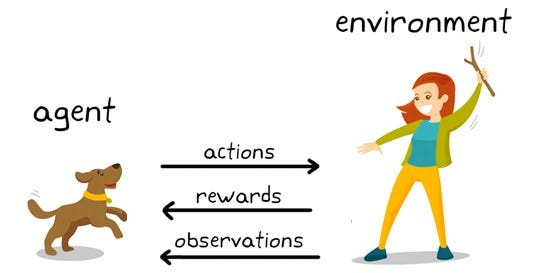

Aqui, o cachorro é o `agente`, que escolherá uma `ação` (correr atrás do graveto) baseado em uma observação do `ambiente` (`estado`) e sua `política` de decisão, isto é, seu aprendizado passado. A escolha de uma ação leva o ambiente para o próximo `estado` (graveto arremessado).

Ao trazer o graveto de volta (continuando a sequência de estado-política-ação), o cachorro ganha carinho e um petisco - `recompensa` positiva pela **sequência** de ações escolhidas! Caso ele não busque o graveto, não receberá recompensa (recompensa = 0).

Dessa forma, podemos iterar este processo e fazer uma espécie de condicionamento, **reforçando** os comportamentos desejados com uma `recompensa` e mitigando os indesejados com uma `recompensa` negativa.

### MENACE

Curiosamente, um dos primeiros modelos de reinforcement learning é de 1961! Concebido por um cientista chamado Donald Michie, o MENACE (_Matchbox Educable Noughts-And-Crosses Engine_) é capaz de aprender a jogar o "jogo da velha" e atingir o desempenho ótimo!

A parte mais interessante é que Michie não tinha acesso a um computador, então construiu seu algoritmo em caixas de fósforo:

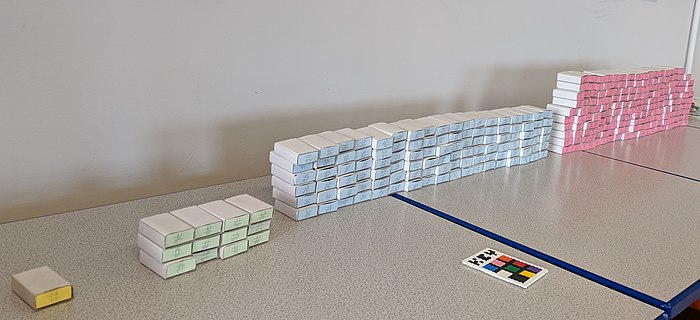

Aqui, cada caixinha de fósforo (304 no total) representa um estado possível do jogo da velha (considerando reflexões e rotações como mesmo estado). Dentro de cada caixa existem miçangas coloridas, onde cada cor representa um lugar possível do tabuleiro para fazer uma jogada.

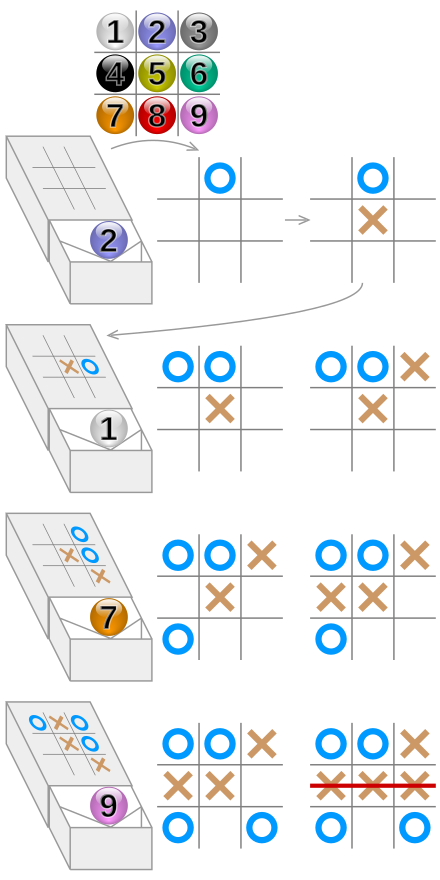

Após o jogo, podemos definir uma recompensa baseado no resultado e _reforçar_ os comportamentos: caso o MENACE tenha perdido, vamos _remover_ das caixinhas todas as miçangas escolhidas. Caso tenha ganhado a partida, vamos _devolver_ as miçangas e _adicionar_ mais 3 da mesma cor em cada caixa, reforçando aquela escolha praquele estado.


##### Legado

O MENACE deixou um legado importante, sendo um marco fundamental na área de _machine learning_ usando conceitos que ainda não tinham sido formalmente definidos. Michie conseguiu provar com esse algoritmo que máquinas são capazes de aprender através da tentativa e erro, e acumular experiência para aprender uma tarefa sem nenhuma informação anterior sobre ela. A inicialização das caixinhas com a mesma quantidade de cada cor de miçanga e sequente seleção aleatória, por exemplo, tem o mesmo comportamento da _inicialização de pesos_ nas redes neurais artificiais.

### Q-Learning

Q-Learning é uma técnica de reinforcement learning para estimar uma função $Q$, que recebe um estado e uma ação e retorna a _qualidade_ dessa ação - daí o nome. No exemplo do MENACE, sabemos os estados e as ações possíveis, mas inicialmente não sabemos a _qualidade_ de cada par de estado e ação. Podemos então interagir com o ambiente e estimar nossa função $Q$ com base na recompensa dessas interações:

<br>

$$\Large Q(s, a) = Q(s, a) + \alpha \cdot (r + \gamma (max(Q(s)-(Q(s, a)))))$$

<br>

Aqui, $\gamma$ representa um fator de _diferença temporal_: o que estamos fazendo é, de certa forma, "propagando" a qualidade de uma ação em um estado para as próximas ações também, descontando uma fração da recompensa. Na prática, pode existir uma ação que é muito ruim imediatamente, mas no futuro leva a uma recompensa muito maior. Esse problema é mitigado por este fator de diferença temporal.

De forma sequencial:

- Inicialize a tabela de valores $Q(s, a)$
- Observe o estado atual $s$
- Escolha uma ação $a$ para esse estado com base na política de seleção
- Tome a ação $s$ e observe a recompensa $r$ bem como o novo estado $s'$
- Atualize o valor $Q(s, a)$ para o estado usando a recompensa observada e a recompensa máxima possível para o próximo estado
- Defina o estado para o novo estado e repita o processo até que um estado terminal seja alcançado

A optimalidade da solução é garantida pela **equação de Bellman**.


#### Explore-exploit

Inicialmente, nosso modelo não sabe nada sobre o ambiente - então não faz sentido usá-lo para escolher a melhor ação! O que faremos é escolher ações _aleatoriamente_ no começo, e calcular e propagar suas respectivas recompensas. Conforme o modelo for aprendendo, vamos diminuindo a chance de uma escolha ser feita aleatoriamente, dando mais peso pro que o modelo aprendeu. Essa técnica é comumente chamada de $\epsilon$-_greedy_, onde $\epsilon$ é a chance de fazer uma escolha aleatória.

## Gymnasium

Antigo OpenAI Gym, o Gymnasium é uma biblioteca e esforço coletivo de formalização e padronização de ambientes para treinamento de modelos de aprendizado por reforço. Essa biblioteca conta com vários problemas pré-definidos e encapsulados em _environments_ com métodos e atributos para nossa conveniência. Vamos resolve um exemplo com o Q-Learning:

In [1]:
!pip install gymnasium


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Uma tarefa simples: treinar um táxi autônomo! Nessa versão super simplificada, queremos que um táxi (agente) busque um passageiro em um lugar específico e deixe em outro no menor tempo possível.

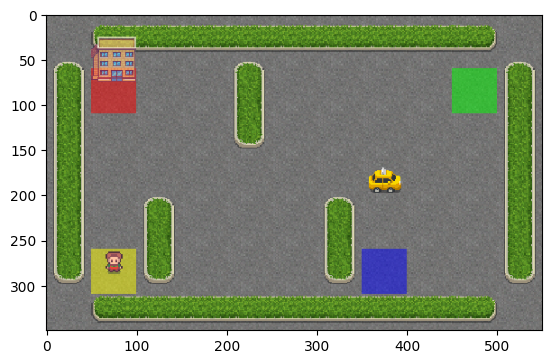

In [2]:
from IPython.display import clear_output
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3", render_mode='rgb_array')
env.reset()

for i in range(1, 100):
    env.step(env.action_space.sample())
    arr = env.render()
    plt.imshow(arr)
    plt.show()
    clear_output(wait=True)

In [3]:
state_space = env.observation_space.n
print(f'Existem {state_space} possíveis estados')
action_space = env.action_space.n
print(f'Existem {action_space} possíveis ações')

Existem 500 possíveis estados
Existem 6 possíveis ações


In [4]:
# Criando nossa Q-table do tamanho certo (500, 6)
Q = np.zeros((500, 6))
print(Q.shape)

(500, 6)


In [5]:
learning_rate = 0.01          # Learning rate
gamma = 0.99                  # Fator de desconto
max_steps = 300

# Parâmetros da política epsilon-greedy
epsilon = 1.0                 # Taxa de exploração
max_epsilon = 1.0             # Taxa de exploração inicial
min_epsilon = 0.001           # Taxa de exploração mínima
decay_rate = 0.01             # Taxa de decaimento do epsilon

In [6]:
import random
import tqdm
for episode in tqdm.tqdm(range(30000)):
    
    # Reiniciar o env
    state = env.reset()[0]
    step = 0
    done = False

    # Reduzindo epsilon (precisamos explorar menos conforme o modelo aprende)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    for step in range(max_steps):
        
        # Definindo ação com política epsilon-greedy
        if(random.uniform(0, 1) > epsilon):
            action = np.argmax(Q[state])
        else:
            action = env.action_space.sample()

        # Executando a ação e observando os resultados
        new_state, reward, done, killed, info = env.step(action)

        # Atualizando q-table
        # Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state][action] = Q[state][action] +\
                        learning_rate * (reward + gamma * np.max(Q[new_state]) - Q[state][action])      
        
        if done: 
            break
        state = new_state

100%|██████████████████████████████████| 30000/30000 [00:20<00:00, 1467.07it/s]


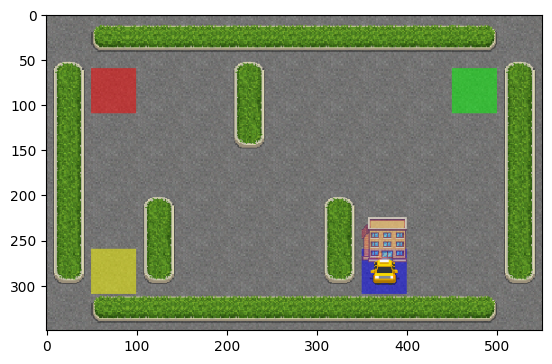

In [7]:
state = env.reset()[0]
step = 0
done = False

while not done:
    action = np.argmax(Q[state][:])
    new_state, reward, done, killed, info = env.step(action)
    arr = env.render()
    plt.imshow(arr)
    plt.show()
    clear_output(wait=True)
    state = new_state

### Exercícios
- Explore os ambientes da biblioteca Gymnasium (https://gymnasium.farama.org/environments/), escolha um problema simples e resolva com o Q-Learning. Use os métodos prontos dos _envs_ (tem na documentação!), aproveite exemplos prontos e foque na aplicação do algoritmo e avaliação do mesmo.